# What are the best topics for blog posts that address university student interests/concerns?

## 1. Introduction

This is a research project for a client that provides assignment marking services to university undergraduate students. Their customers are Universities, Schools, Private Providers, and Governments. The company employs subject specialists who mark assignments and provide feedback to students at the institutions who buy their services. 

The company's core offer is based on the improved retention rates and attainment that their services contribute to. Their web page prominently features 'impact studies' that seek to demonostrate the efficacy of their services. They highlight not only the postive impact on attainment, but also positive impact on general wellbeing of students (reduced anxiety, life satisfaction and happiness). 

*Please note that the framework and code for this project are adapted from the DataQuest guided project,'Popular Data Science Questions. Find out more [here.](https://app.dataquest.io/m/469/guided-project%3A-popular-data-science-questions/1/introduction)*

## 2. Goal

The client company runs a blog that is designed to engage with both the end users (ie. students) and partner institutions (both current and potential). The blog covers topics that are relevant to these stakeholders. 

> The purpose of this project is to gather data on what the main concerns/interests are of university students in the UK to inform what gets covered by the blog.


## 3. Planning

### Stack Exchange

We are going to look on Stack Exchange: Stack Exchange host sites on a multitude of fields and subjects, including mathematics, physics, philosophy and higher education. 

The purpose of each site it to allow users to post questions and other users answer them. Stack Exchange uses a reputation award system for its questions and answers: each post- each questions/answer- is subject to both upvotes and downvotes. As such, 'good' posts are easily identified. 

It seems like the following Stack Exchange website could be useful for our purposes: 

* [Academia](https://academia.stackexchange.com/)

This is 'a question and answer site for academics and those enrolled in higher education'. There are over 35k questions on the site and 106k users. 

**What kind of questions are allowed on the site?**

The [Tour](https://academia.stackexchange.com/tour) of the site says that users should ask about:

* academic careers,
* requirements and expectations of students, postdocs, or professors,
* inner workings of research departments,
* academic writing and publishing,
* studying and teaching at institutions of higher education (universities, colleges, …)

**What, other than questions, does DSSE's [home](https://academia.stackexchange.com/) subdivide into?**

* [Questions](https://academia.stackexchange.com/questions)- a list of questions being asked about
* [Tags](https://academia.stackexchange.com/tags)- a list of tags (ie. keywords) that categorize the questions


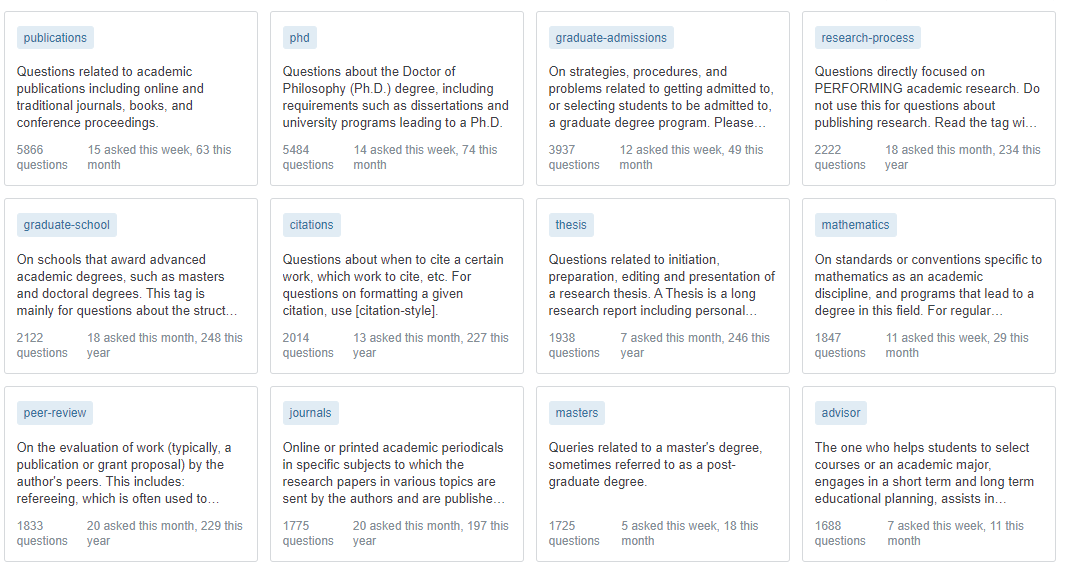

* [Users](https://academia.stackexchange.com/users)- a list of users
* [Unanswered](https://academia.stackexchange.com/unanswered)- a list of the currently unanswered questions

The tagging system looks helpful to our purposes, as this will allow us to look at how many questions are asked about each subject.

We can also note that, since the site is heavily moderated by its' community, we can have some confidence in using the tagging system to derive our conclusions. 

**What information is available in each post?**

Taking [this question](https://academia.stackexchange.com/questions/161964/wrong-way-of-teaching) as an example, we can see that some of the informatin on a post is as follows:

* For both the questions and answers: 
    * The post's score
    * The post's title
    * The post's author
    * The post's body
* For questions only: 
    * The last time the question was active
    * How many times the questions was viewed
    * Related questions
    * The question's tags

# 4. Data: Collection & Exploration 


## Stack Exchange Data Explorer

Looking at the table names in the Data Explorer, a few stand out as relevant to our goal:

* Tags
* Posts

Running a few exploratory queries, leads us to focus our efforts on the Posts table. The Tags table looked very promising as it tells us how many times each tag was used, but there's no way to tell just from this if the interest in these tags is recent or a thing from the past.

## Getting the Data

To get the relevant data, we run the following query: 

SELECT Id, CreationDate,
       Score, ViewCount, Tags,
       AnswerCount, FavoriteCount
  FROM posts
 WHERE PostTypeId = 1 AND YEAR(CreationDate) = 2021;
 
 This is what the first few rows look like: 
 
 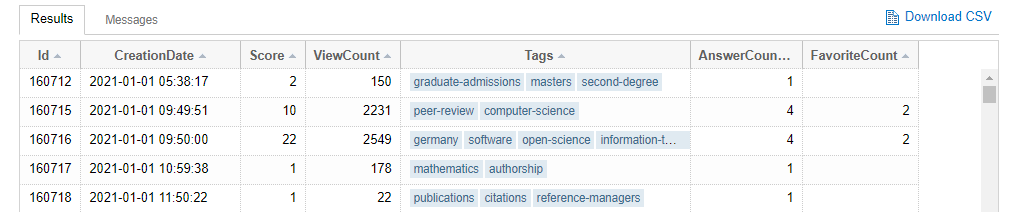

## Exploring the Data

We can read in the data; and at the same time immediately ensure that CreationDate is stored as a datatime object:

In [3]:
# We import everything that we will use

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [4]:
questions= pd.read_csv('academia.csv',parse_dates=['CreationDate'])

In [3]:
# Running questions.info() should provide us with a lot of useful information:

questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4807 entries, 0 to 4806
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             4807 non-null   int64         
 1   CreationDate   4807 non-null   datetime64[ns]
 2   Score          4807 non-null   int64         
 3   ViewCount      4807 non-null   int64         
 4   Tags           4807 non-null   object        
 5   AnswerCount    4807 non-null   int64         
 6   FavoriteCount  1202 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 263.0+ KB


We note that 'FavoriteCount' has missing values: a missing value in this column probably just means that the question was not in any user's favourite list when we ran this query. As such, we can safely just replace the null values with zero. 

We can see that the types seem adequate for every column. However, after we fill in the missing values on FavoriteCount, there is no reason to store the values as floats (we can just change them to integers).

The 'object' dtype is a catch-all type, so let's see what types the objects in questions["Tags"] are:

In [5]:
questions["Tags"].apply(lambda value: type(value)).unique()

array([<class 'str'>], dtype=object)

We can see that every value in this column is a string. On Stack Exchange, each question can only have a maximum of five tags (source), so one way to deal with this column is to create five columns in questions called Tag1, Tag2, Tag3, Tag4, and Tag5 and populate the columns with the tags in each row.

However, since doesn't help is relating tags from one question to another, we'll just keep them as a list.

## Cleaning the Data

We begin by fixing the FavoriteCount:

In [6]:
questions.fillna(value={"FavoriteCount": 0}, inplace=True)
questions["FavoriteCount"] = questions["FavoriteCount"].astype(int)
questions.dtypes

Id                        int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount             int32
dtype: object

In [7]:
#Let's also change the spelling of 'favorite'  to the English spelling of 'favourite' so I don't keep typing it wrong!

questions['FavouriteCount']=questions['FavoriteCount']
del questions['FavoriteCount']
questions.dtypes

Id                         int64
CreationDate      datetime64[ns]
Score                      int64
ViewCount                  int64
Tags                      object
AnswerCount                int64
FavouriteCount             int32
dtype: object

Next, we will modify the Tags to make it easier to work with. First a reminder of what the tags look like before cleaning: 

In [8]:
questions['Tags'].head(5)

0                         <publications><proofreading>
1                   <recommendation-letter><interview>
2         <graduate-admissions><recommendation-letter>
3                                   <ethics><teaching>
4    <research-process><united-states><teaching><co...
Name: Tags, dtype: object

In [9]:
#We are going to remove the '<' and '>' characters from the beginning and end of each tag;
# and then separate each tag with a comma (rather than the '><'):

questions['Tags']= questions['Tags'].str.replace('^<|>$', '').str.split('><')
questions.head(5)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavouriteCount
0,142237,2020-01-01 01:12:29,2,170,"[publications, proofreading]",1,1
1,142246,2020-01-01 13:18:44,3,937,"[recommendation-letter, interview]",2,0
2,142249,2020-01-01 14:17:10,0,388,"[graduate-admissions, recommendation-letter]",4,1
3,142258,2020-01-01 19:40:02,-4,254,"[ethics, teaching]",2,0
4,142266,2020-01-02 03:49:28,2,232,"[research-process, united-states, teaching, co...",1,0


# 5. Analysis


## Most Used and Most Viewed

We will start by counting how many times each tag was used: 

In [10]:
tag_count=dict()

for tags in questions['Tags']:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] +=1
        else:
            tag_count[tag] =1

In [11]:
# Let's have a look at a sample of the dictionary:
import random

def sample_from_dict(d, sample=10):
    keys = random.sample(list(d), sample)
    values = [d[k] for k in keys]
    return dict(zip(keys, values))

sample_from_dict(tag_count)

{'teaching-assistant': 31,
 'medicine': 19,
 'disreputable-publishers': 25,
 'creative-commons': 7,
 'bibtex': 6,
 'research-undergraduate': 122,
 'code': 33,
 'students': 56,
 'network-analysis': 3,
 'homework': 22}

For improved aesthetics, we can transform the tag_count dictionary into a dataframe:

In [12]:
tag_count= pd.DataFrame.from_dict(tag_count, orient='index')
tag_count.rename(columns={0:'Count'}, inplace=True)
tag_count.head(10)

,Count
publications,759
proofreading,9
recommendation-letter,167
interview,77
graduate-admissions,535
ethics,201
teaching,141
research-process,272
united-states,264
communication,71


Now we can sort this dataframe by Count and visualize the top 30 results.

In [13]:
most_used= tag_count.sort_values(by='Count').tail(30)
most_used

,Count
cv,114
supervision,115
research-undergraduate,122
job-search,133
authorship,134
conference,141
teaching,141
etiquette,155
career-path,158
recommendation-letter,167


30 is a somewhat arbitrary threshold, and we can look at other ranges. However, the popularity of the tags declines outside of the top 30, so this amount should be enough to help us with our goal. Let's now visulaize this data.

<AxesSubplot:>

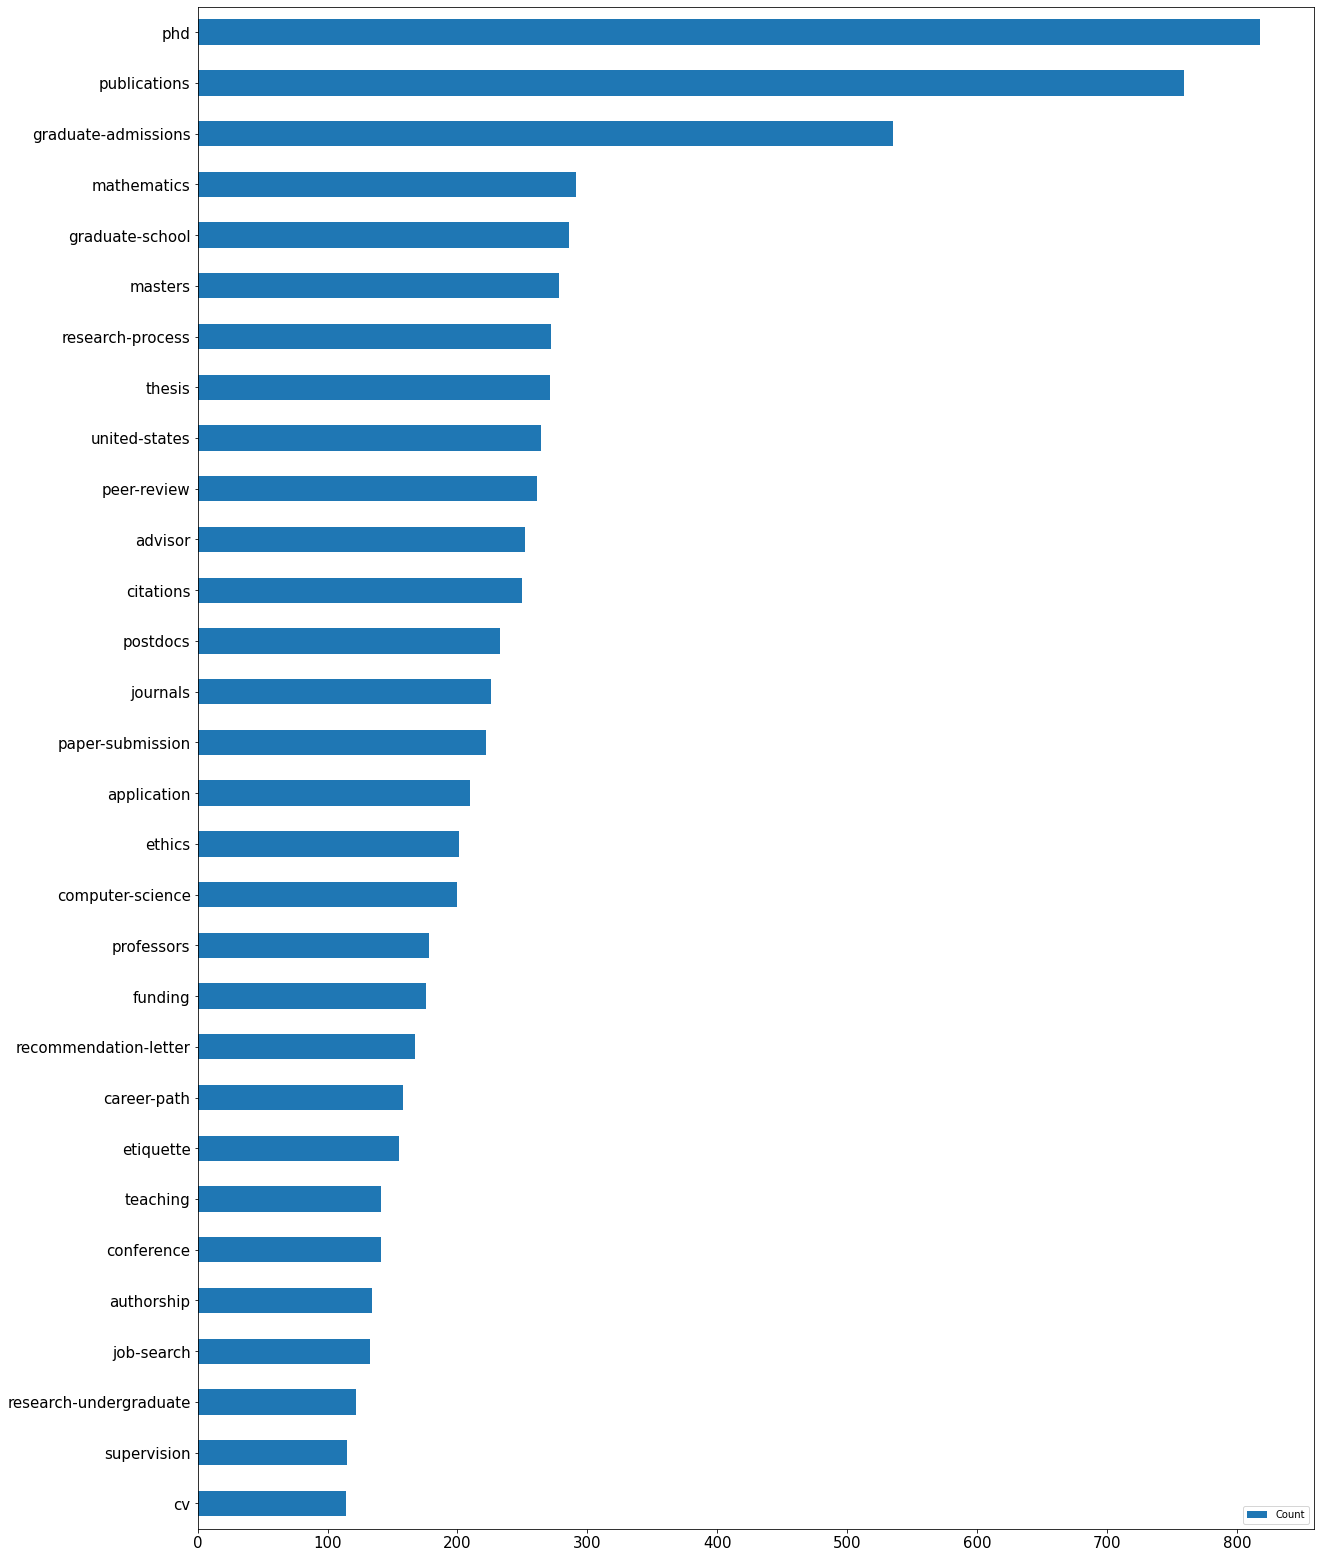

In [14]:
most_used.plot(kind="barh",fontsize=15,figsize=(20,28))

Before we investigate the tags a bit more, let's do the same as above for views.

In [15]:
#build dictionary

tag_view_count=dict()

for index, row in questions.iterrows():
    for tag in row['Tags']:
        if tag in tag_view_count:
            tag_view_count[tag] += row['ViewCount']
        else:
            tag_view_count[tag] = row['ViewCount']
            
#convert to pd dataframe

tag_view_count= pd.DataFrame.from_dict(tag_view_count, orient='index')
tag_view_count.rename(columns={0:'ViewCount'}, inplace=True)
tag_view_count.head(10)

,ViewCount
publications,707059
proofreading,17111
recommendation-letter,134426
interview,78063
graduate-admissions,248338
ethics,492014
teaching,305181
research-process,162199
united-states,388163
communication,163138


In [16]:
most_viewed = tag_view_count.sort_values(by="ViewCount").tail(30)
print(most_viewed)

                     ViewCount
conference              151283
citations               152541
research-process        162199
communication           163138
paper-submission        168497
authorship              172529
career-path             173880
computer-science        177297
supervision             178346
email                   197654
masters                 201531
postdocs                212770
journals                219378
plagiarism              228428
graduate-admissions     248338
covid-19                279220
etiquette               287313
teaching                305181
professors              306214
cheating                307949
graduate-school         310377
thesis                  322073
exams                   322938
peer-review             331837
advisor                 347097
united-states           388163
mathematics             401503
ethics                  492014
publications            707059
phd                     779610


<AxesSubplot:>

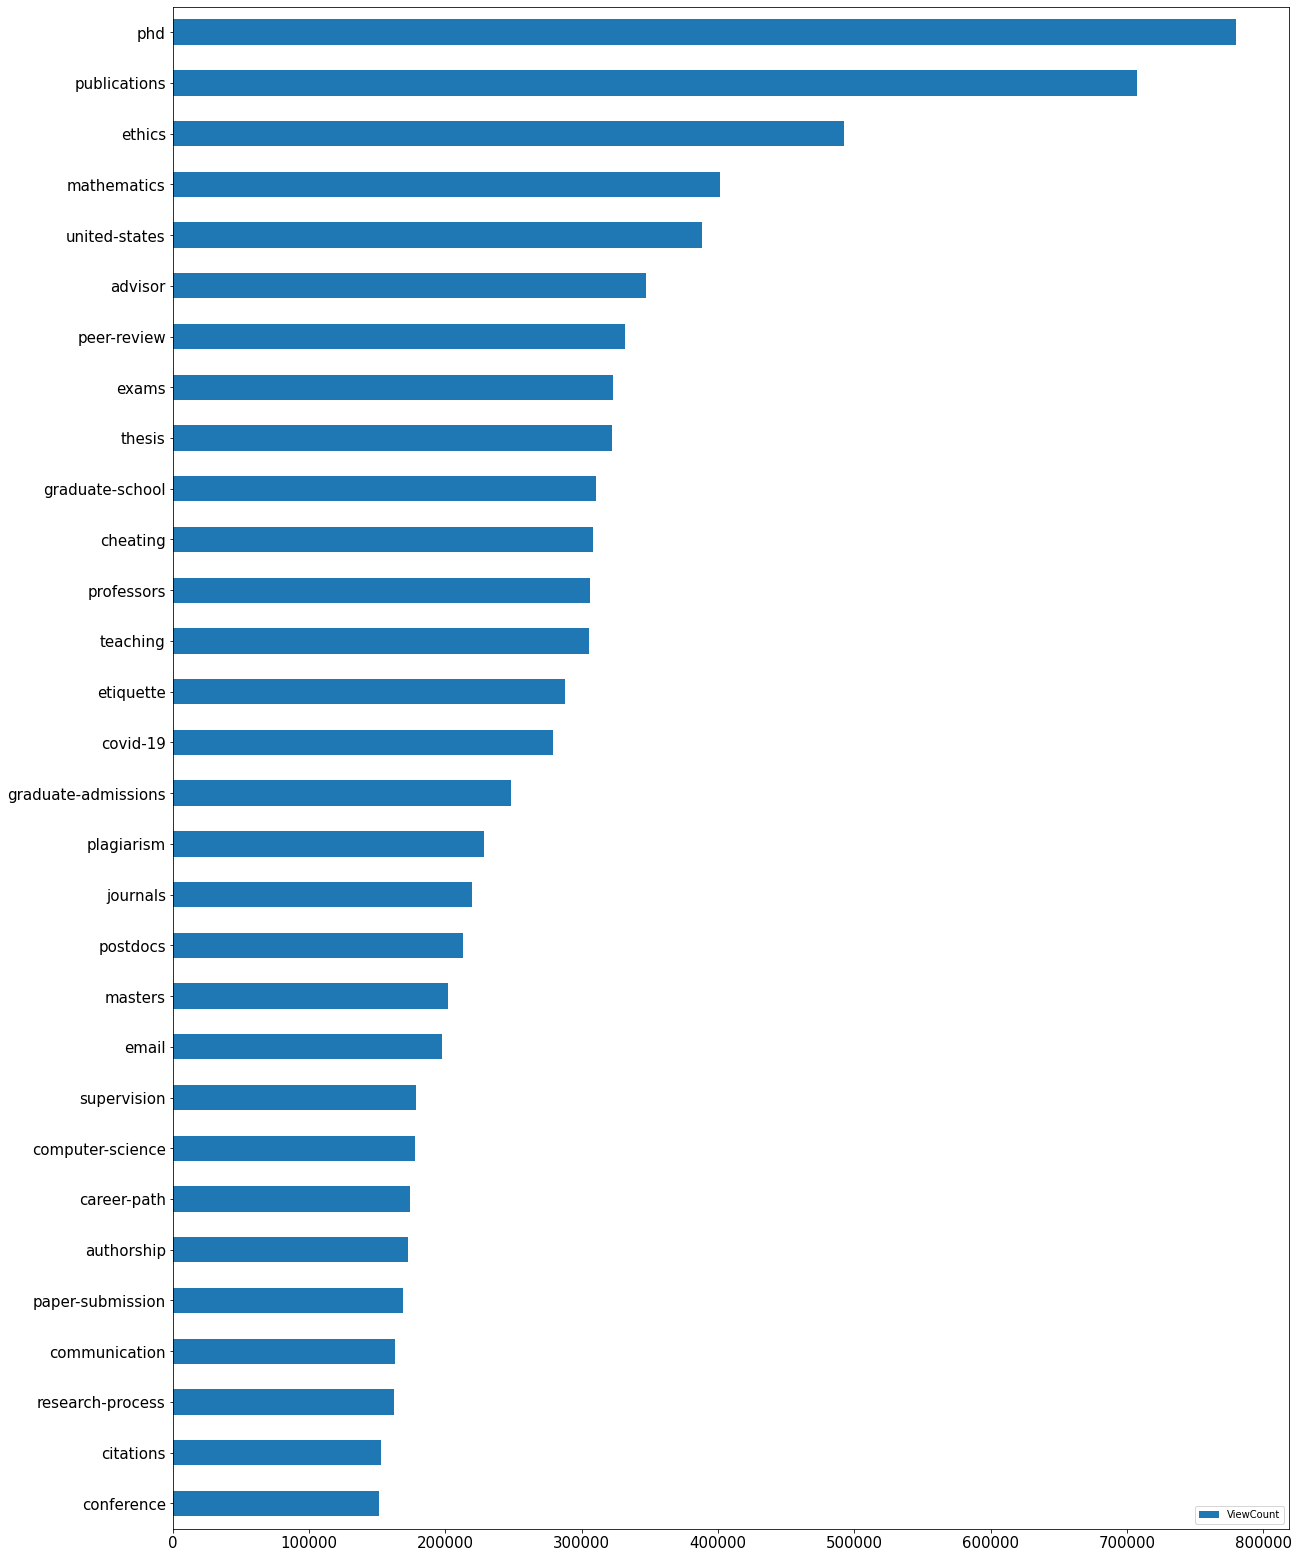

In [17]:
most_viewed.plot(kind="barh",fontsize=15,figsize=(20,28))

Let's compare both charts side by side:

array([<AxesSubplot:title={'center':'ViewCount'}>], dtype=object)

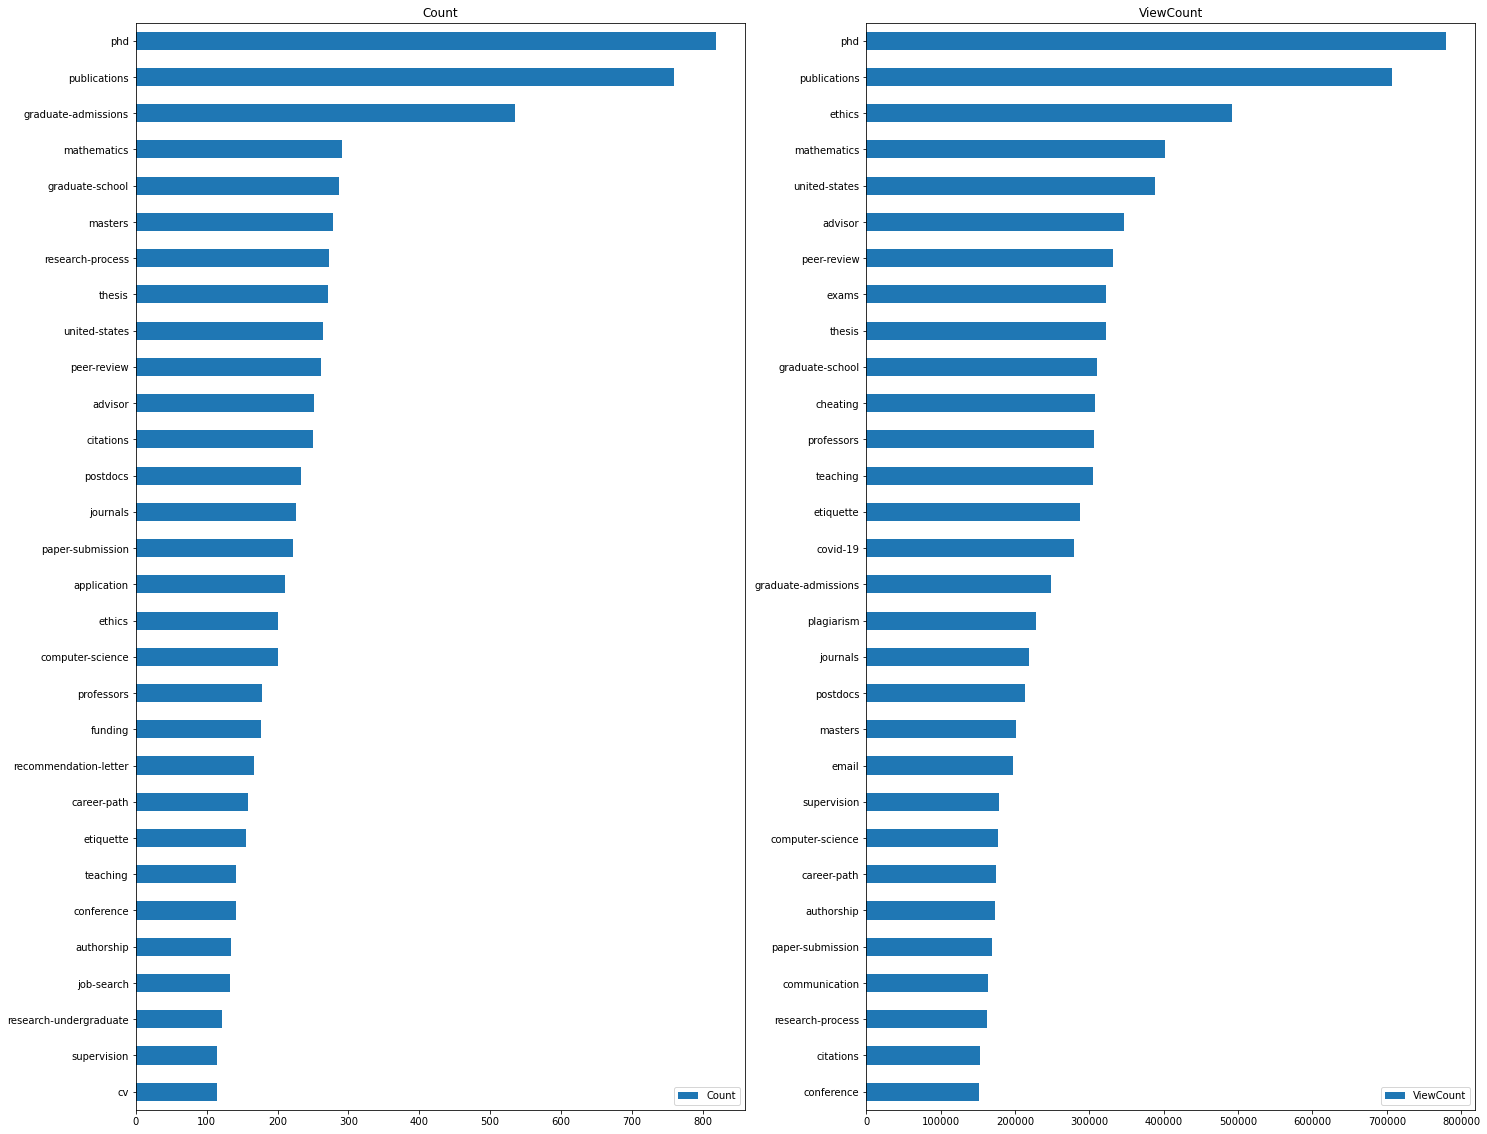

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((24,20))
most_used.plot(kind="barh", ax=axes[0], subplots=True)
most_viewed.plot(kind="barh", ax=axes[1], subplots=True)

We can also create a summary table comparing the counts in each of the dataframes above:

In [19]:
in_used = pd.merge(most_used, most_viewed, how="left", left_index=True, right_index=True)
in_viewed = pd.merge(most_used, most_viewed, how="right", left_index=True, right_index=True)

print(in_used.tail(10))
print('\n')
print(in_viewed.tail(10))

                     Count  ViewCount
peer-review            261   331837.0
united-states          264   388163.0
thesis                 271   322073.0
research-process       272   162199.0
masters                278   201531.0
graduate-school        286   310377.0
mathematics            291   401503.0
graduate-admissions    535   248338.0
publications           759   707059.0
phd                    818   779610.0


                 Count  ViewCount
graduate-school  286.0     310377
thesis           271.0     322073
exams              NaN     322938
peer-review      261.0     331837
advisor          252.0     347097
united-states    264.0     388163
mathematics      291.0     401503
ethics           201.0     492014
publications     759.0     707059
phd              818.0     779610


## Relations Between Tags

One way that we can try to guage how pairs of tags are related to each other is to count how many times each pair appears together. We will do this now. We start by creating a list of all tags.

In [20]:
all_tags = list(tag_count.index)

Next, we create a dataframe where each row will represent a tag and each column as well. Something that looks like this:

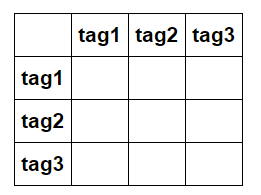

In [21]:
associations = pd.DataFrame(index=all_tags, columns=all_tags)
associations.iloc[0:4,0:4]

,publications,proofreading,recommendation-letter,interview
publications,NaN,NaN,NaN,NaN
proofreading,NaN,NaN,NaN,NaN
recommendation-letter,NaN,NaN,NaN,NaN
interview,NaN,NaN,NaN,NaN


Next, we will fill this dataframe with zeros and then, for each of the lists of tags in questions ['Tags'], we will increment the intervening tages by one. The result will be a dataframe that for each pair of tags, tells us how many times they were used together. 

In [25]:
associations.fillna(0, inplace=True)

for tags in questions["Tags"]:
    associations.loc[tags, tags] += 1

associations.shape

(452, 452)

This resulting dataframe is quite large, so we will focus our attention on the most used tags. We'll add some colours to make it easier to talk about the dataframe.

In [26]:
relations_most_used = associations.loc[most_used.index, most_used.index]

relations_most_used.shape

(30, 30)

Next, we are going to create a heatmap that gives us some insight into which terms were used together the most often.

First, we are going to get rid of the values where a tag matches with itself, so that these values don't skew our data. 

In [27]:
for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i,i] = pd.np.NaN

<ipython-input-27-2d3c201ff994>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  relations_most_used.iloc[i,i] = pd.np.NaN


<AxesSubplot:>

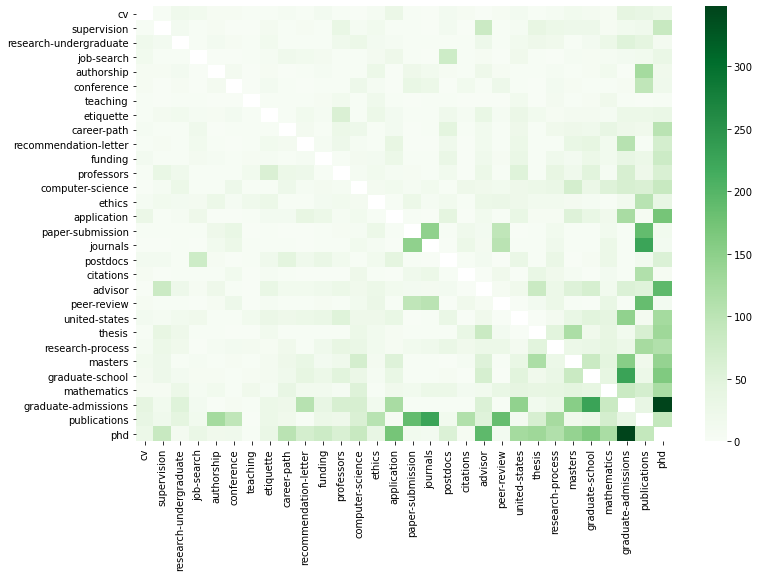

In [28]:
plt.figure(figsize=(12,8))
sns.heatmap(relations_most_used, cmap="Greens", annot=False)

We can see from the above that the most used tags seem to have the strongest relationships, judging by the 'heat concentration' in the bottom right corner. This could of course be due to the fact these these terms are used a lot; and therefore end up getting used together without there necessarily being a strong relationship between them. A lot of people buy bread and a lot of people buy toilet paper and these are often purchased at the same time, but it doesn't necessarily follow that the there is a strong relationship between the two (like there might be a strong relationship between, say, bacon and eggs...).

Another issue is that the above only looks at relations between pair of tags and not between multiple groups of tags; so if could, for example, be the case that when used together, two terms have a 'strong' relationship with another term, but each by itself doesn't.

DataQuest suggest that there is a powerful data mining technique which could allow us to handle cases: association rules. However, this is outside the scope of the current project. 


## Drawing on Domain Knowledge



A good number of the tops tags seem to be associated with phd-level study. This may well reflect the fact that a good number of users on this domain may be students who are quite advanced in their studies, perhaps Master students who are contemplating a phd; or perhaps those doing a phd themselves. Since are client is mostly aiming at undergraduate students, these topics may be beyond the scope of their blog. 

Let's look at our in_used dataframe and decide which tags could be associated with phd study: 

In [29]:
print(in_used.tail(20))

                     Count  ViewCount
funding                176        NaN
professors             178   306214.0
computer-science       200   177297.0
ethics                 201   492014.0
application            210        NaN
paper-submission       222   168497.0
journals               226   219378.0
postdocs               233   212770.0
citations              250   152541.0
advisor                252   347097.0
peer-review            261   331837.0
united-states          264   388163.0
thesis                 271   322073.0
research-process       272   162199.0
masters                278   201531.0
graduate-school        286   310377.0
mathematics            291   401503.0
graduate-admissions    535   248338.0
publications           759   707059.0
phd                    818   779610.0


So perhaps these tags are not relevant: 
* phd
* publications
* thesis
* peer-review
* postdocs
* paper-submission
* funding

The 'united-states' tag is also a bit too vague; and the 'graduate-admissions' tag seem to relate to pre-university course issues, so let's remove these two too. 

Let's remove these tags from the dataframe and see what we are left with.

In [30]:
rows=['phd','publications','thesis','peer-review','postdocs','paper-submission','funding','united-states','graduate-admissions']

in_used_final= in_used.drop(index=rows)

Let's do the same for the in_viewed dataframe:

In [31]:
print(in_viewed.tail(20))

                     Count  ViewCount
masters              278.0     201531
postdocs             233.0     212770
journals             226.0     219378
plagiarism             NaN     228428
graduate-admissions  535.0     248338
covid-19               NaN     279220
etiquette            155.0     287313
teaching             141.0     305181
professors           178.0     306214
cheating               NaN     307949
graduate-school      286.0     310377
thesis               271.0     322073
exams                  NaN     322938
peer-review          261.0     331837
advisor              252.0     347097
united-states        264.0     388163
mathematics          291.0     401503
ethics               201.0     492014
publications         759.0     707059
phd                  818.0     779610


In [32]:
rows=['phd','publications','thesis','peer-review','thesis','journals', 'united-states','graduate-admissions','postdocs']

in_viewed_final= in_viewed.drop(index=rows)

# 6. Conclusion

Let's have another look at the top 10 tags in the in_used and in_viewed data_frames:

In [33]:
in_used_final.tail(10)

,Count,ViewCount
computer-science,200,177297.0
ethics,201,492014.0
application,210,NaN
journals,226,219378.0
citations,250,152541.0
advisor,252,347097.0
research-process,272,162199.0
masters,278,201531.0
graduate-school,286,310377.0
mathematics,291,401503.0


In [34]:
in_viewed_final.tail(10)

,Count,ViewCount
covid-19,NaN,279220
etiquette,155.0,287313
teaching,141.0,305181
professors,178.0,306214
cheating,NaN,307949
graduate-school,286.0,310377
exams,NaN,322938
advisor,252.0,347097
mathematics,291.0,401503
ethics,201.0,492014


The above tags thus give us some insight into what university students are currenlty asking about on the Academia Stack Exchange; and these are very likely good topics for blog posts that will engage with university students.